<a href="https://colab.research.google.com/github/IvonaKirevska/VNP/blob/master/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [2]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 50.4MB/s]


In [3]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [5]:
missing_percentage = df.isnull().mean() * 100

In [6]:
missing_percentage

,0
Pregnancies,1.822917
Glucose,0.000000
BloodPressure,0.000000
SkinThickness,1.041667
Insulin,0.000000
BMI,1.302083
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Figure size 1000x600 with 0 Axes>

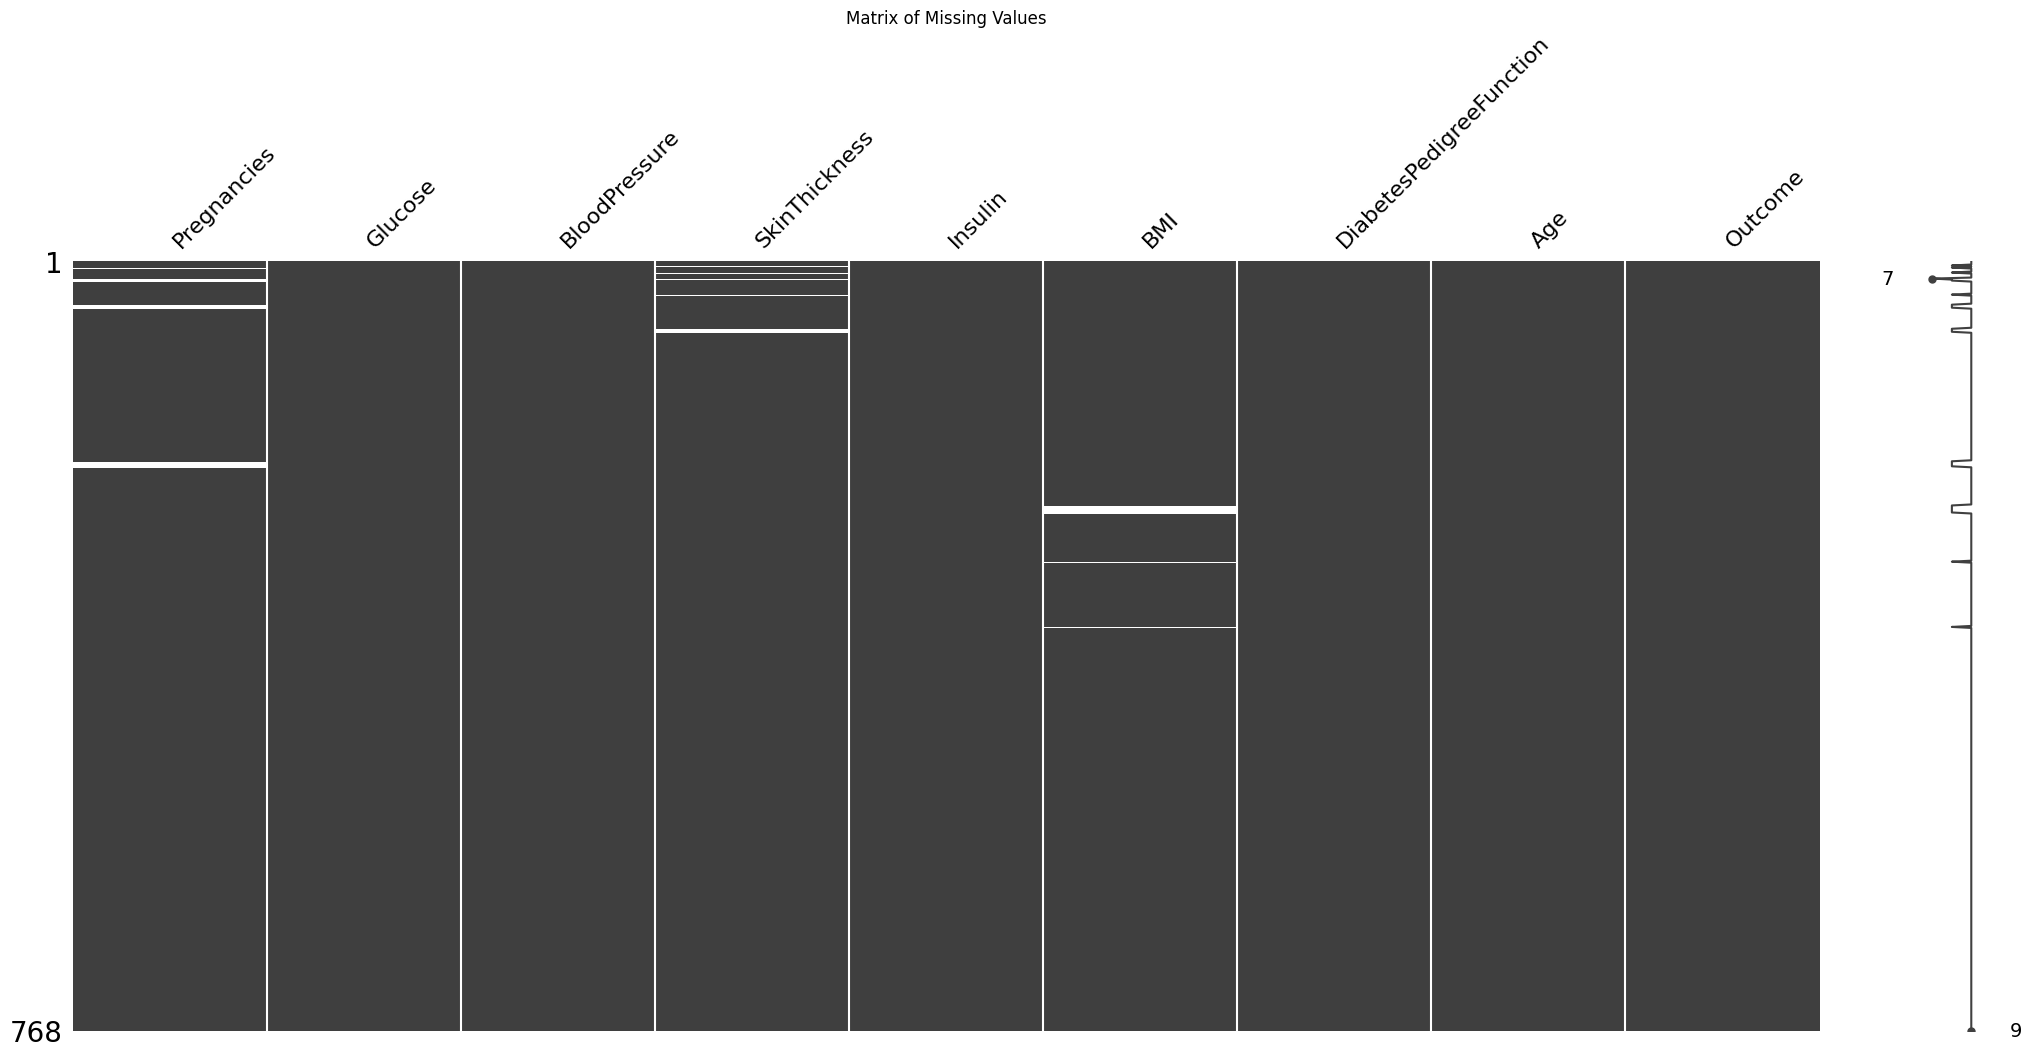

<Figure size 1000x600 with 0 Axes>

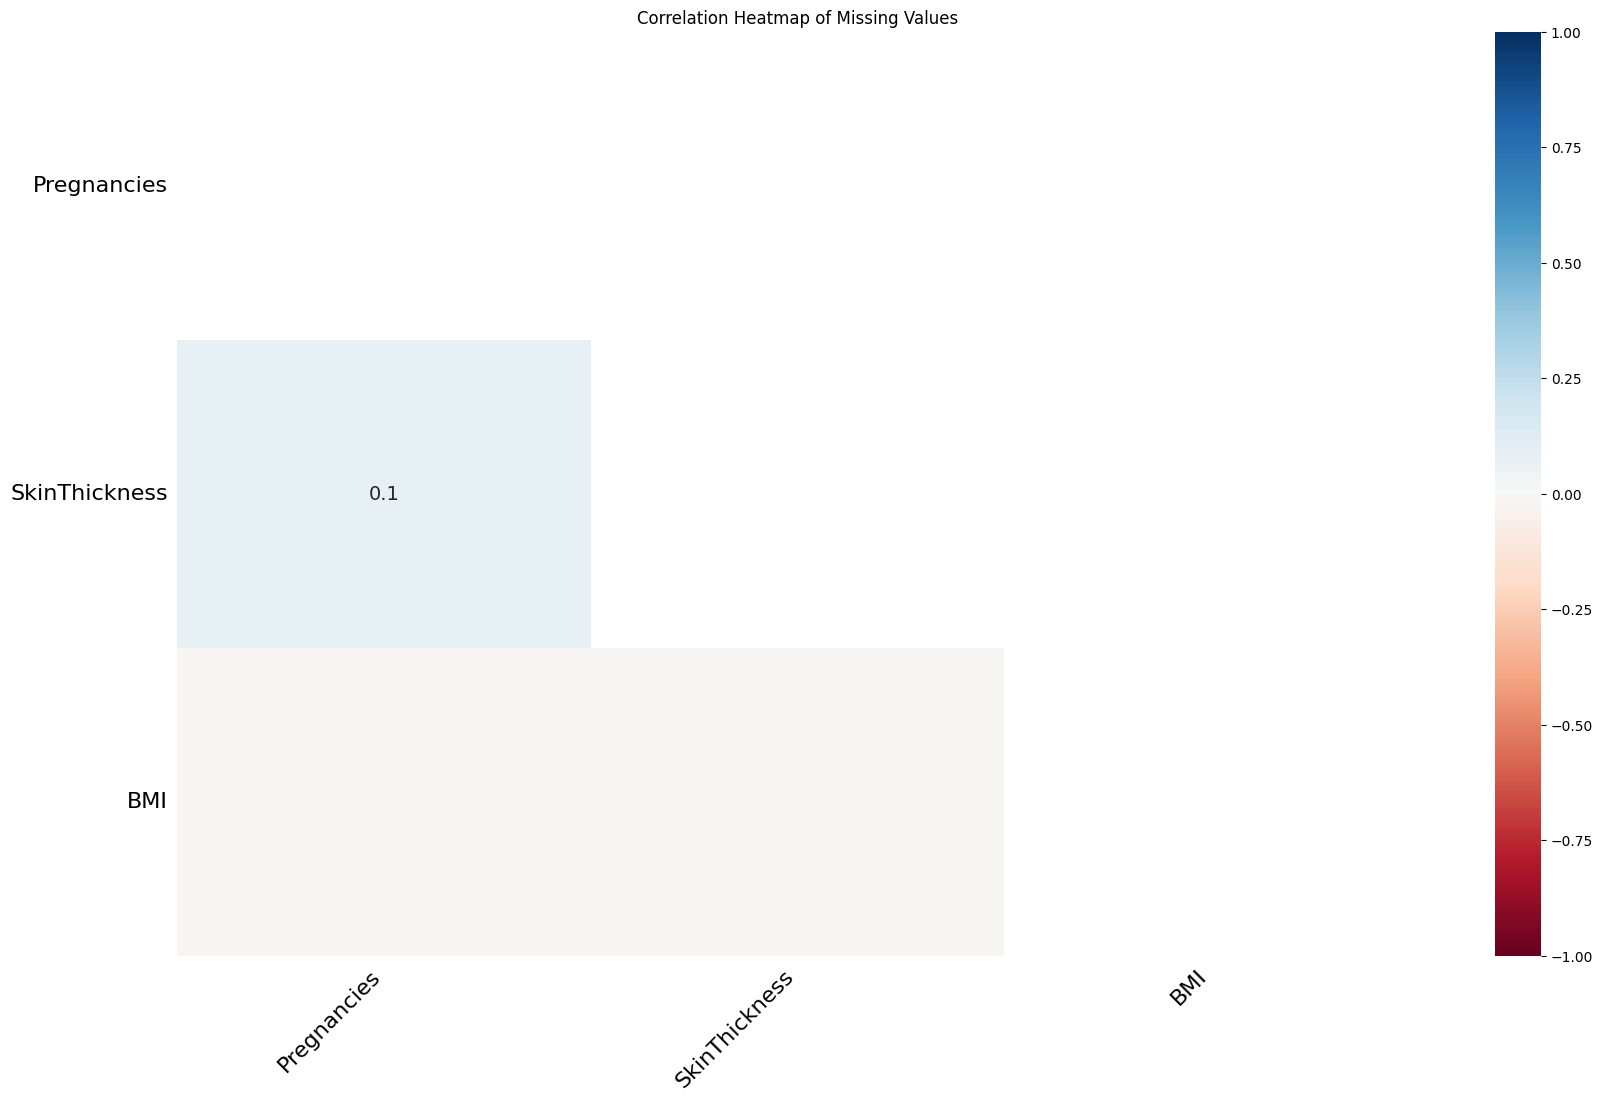

<Figure size 1000x600 with 0 Axes>

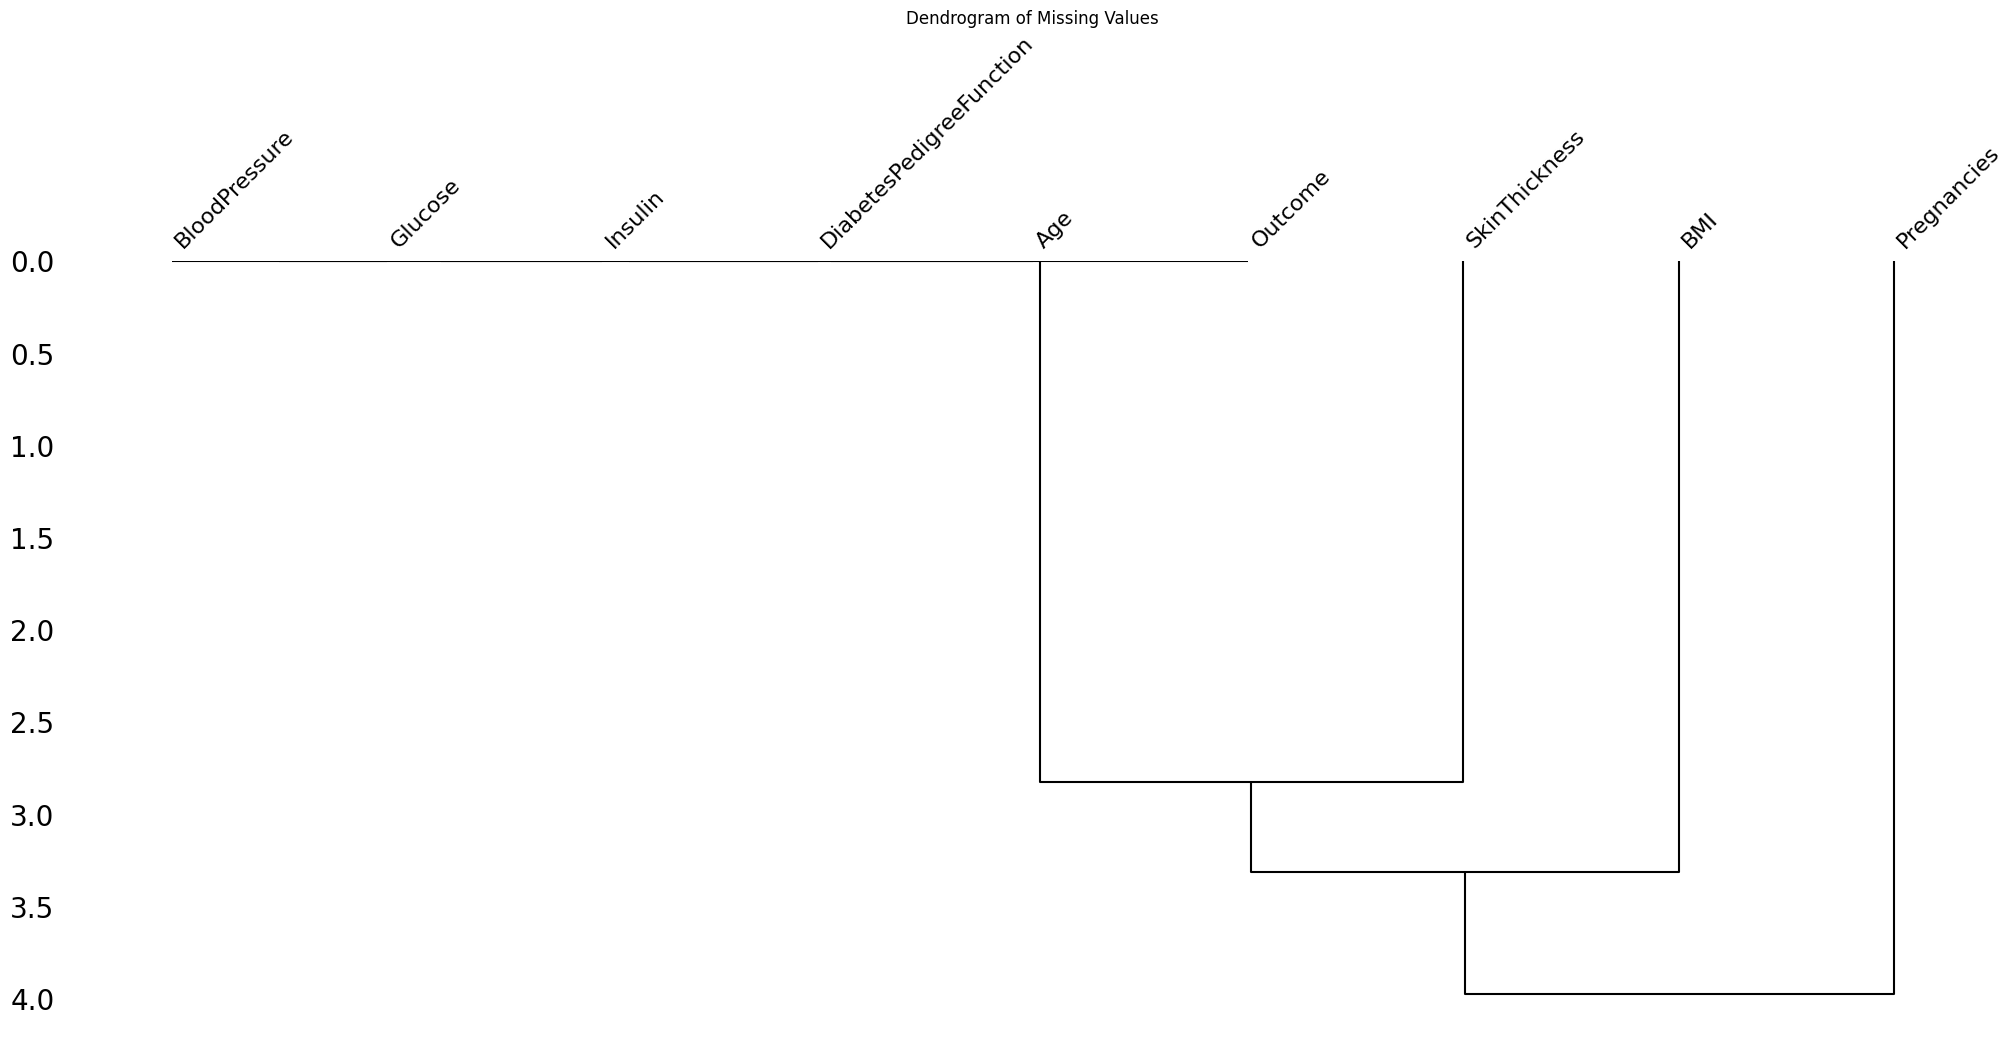

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Matrix of Missing Values")
plt.show()

plt.figure(figsize=(10, 6))
msno.heatmap(df)
plt.title("Correlation Heatmap of Missing Values")
plt.show()

plt.figure(figsize=(10, 6))
msno.dendrogram(df)
plt.title("Dendrogram of Missing Values")
plt.show()

## <font color = 'Orange'>Handle the missing values</font>

In [8]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
df["Pregnancies"] = cat_imputer.fit_transform(df[["Pregnancies"]])
df["SkinThickness"] = cat_imputer.fit_transform(df[["SkinThickness"]])
df["BMI"] = cat_imputer.fit_transform(df[["BMI"]])


## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [9]:
df.to_csv("imputed_dataset.csv", index=False)

Print the first rows of your final Dataset

In [10]:
cleaned_df=pd.read_csv("/content/imputed_dataset.csv")
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [11]:
from sklearn.model_selection import train_test_split
X=cleaned_df.drop(columns=['Outcome'])
y=cleaned_df['Outcome']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [13]:
y_pred=knn.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Confusion Matrix:
[[70 29]
 [22 33]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73        99
           1       0.53      0.60      0.56        55

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154


Accuracy Score:
0.6688311688311688
